In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Load the sales dataset
data = pd.read_csv('/content/sales_dataset.csv')

<ipython-input-5-b5576c909957>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/sales_dataset.csv')


In [ ]:
# Step 1: Display the first five rows of the dataset to understand its structure
data.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
# Remove Duplicate
data = data.drop_duplicates()


In [ ]:
# Set the 'Amount' to 0 for orders with 'Cancelled' status
data.loc[data['Status'] == 'Cancelled', 'Amount'] = 0

In [ ]:
# Replace Null Value By median of Data
data['Amount'].fillna(data['Amount'].median(), inplace=True)

<ipython-input-9-8457bb25455b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount'].fillna(data['Amount'].median(), inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128943 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128943 non-null  object 
 1   Date                128943 non-null  object 
 2   Status              128943 non-null  object 
 3   Fulfilment          128943 non-null  object 
 4   Sales Channel       128943 non-null  object 
 5   ship-service-level  128943 non-null  object 
 6   Style               128943 non-null  object 
 7   SKU                 128943 non-null  object 
 8   Category            128943 non-null  object 
 9   Size                128943 non-null  object 
 10  ASIN                128943 non-null  object 
 11  Courier Status      122072 non-null  object 
 12  Qty                 128943 non-null  int64  
 13  currency            121152 non-null  object 
 14  Amount              128943 non-null  float64
 15  ship-city           128910 non-null  ob

In [ ]:
data.describe()

,Qty,Amount,ship-postal-code
count,128943.000000,128943.000000,128910.00000
mean,0.904648,556.620473,463978.72546
std,0.314758,346.485412,191471.57590
min,0.000000,0.000000,110001.00000
25%,1.000000,376.000000,382421.00000
50%,1.000000,545.000000,500033.00000
75%,1.000000,760.000000,600024.00000
max,15.000000,5584.000000,989898.00000


# Total Revenue

In [ ]:
total_revenue = data['Amount'].sum()
total_revenue

71772313.62

# Top Selling Product Category by Quantity

In [ ]:
top_selling_products = data.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(5)
top_selling_products

,Qty
Category,
Set,45286
kurta,45048
Western Dress,13943
Top,9902
Ethnic Dress,1052


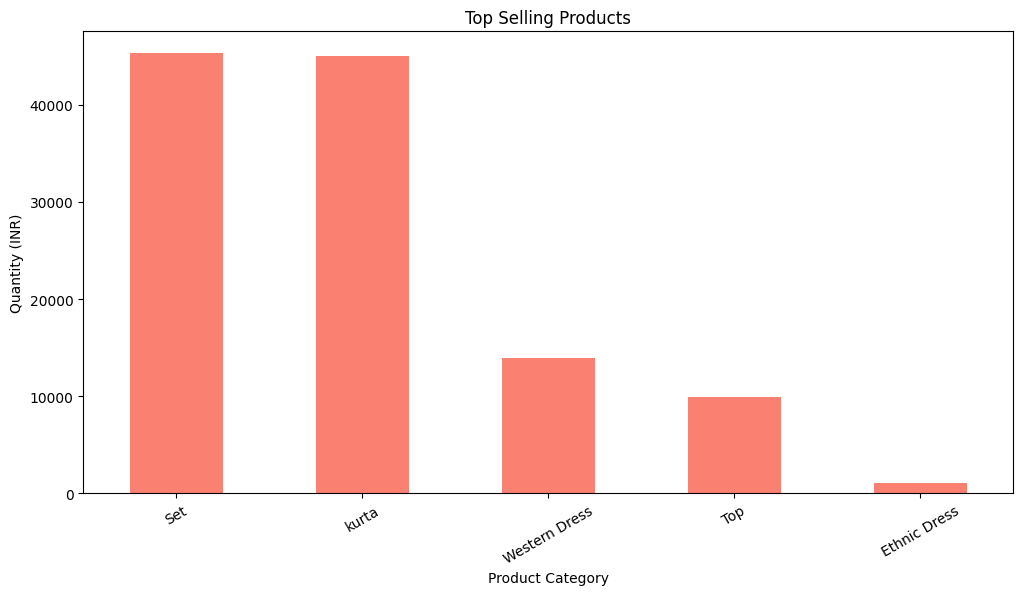

In [ ]:
# Top-Selling Products
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='salmon')
plt.title('Top Selling Products')
plt.ylabel('Quantity (INR)')
plt.xlabel('Product Category')
plt.xticks(rotation=30)
plt.show()

# Average Order Value

In [ ]:
average_order_value = data.groupby('Order ID')['Amount'].sum().mean()
average_order_value

596.3533104559958

# Identify Peak Sales by week days

In [ ]:
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check if the conversion was successful
data['Date'].dtype

# Now, group the data by day of the week and calculate total sales for each day
weekday_sales_amount = data.groupby(data['Date'].dt.day_name())['Amount'].sum()

# Display total sales for each day of the week
weekday_sales_amount_sorted = weekday_sales_amount.reindex(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Show the sales amount for each day of the week
weekday_sales_amount_sorted

,Amount
Date,
Sunday,11009906.00
Monday,10301495.00
Tuesday,10489883.00
Wednesday,10315712.00
Thursday,9490909.00
Friday,9861726.00
Saturday,10302682.62


<ipython-input-17-d4724715d1ed>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


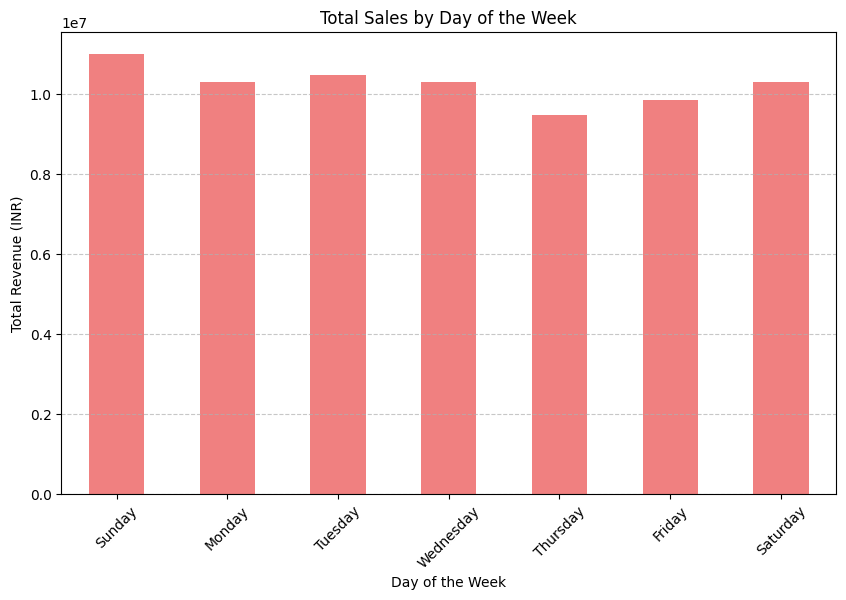

In [ ]:
# Create a bar chart for sales by weekday
plt.figure(figsize=(10, 6))
weekday_sales_amount_sorted.plot(kind='bar', color='lightcoral')
plt.style.use('seaborn-pastel')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Top Performing Location by Revenue

In [ ]:
top_locations = data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(5)
top_locations

,Amount
ship-city,
BENGALURU,6349713.00
HYDERABAD,4499883.57
MUMBAI,3400494.00
NEW DELHI,3331168.48
CHENNAI,2823610.00


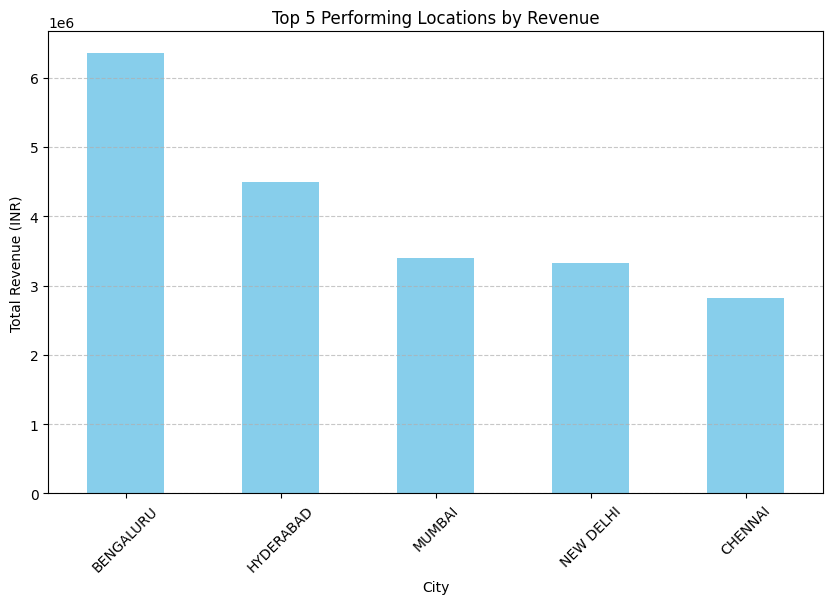

In [ ]:
# Create a bar chart for the top 5 locations
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Performing Locations by Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Differentiating B2B vs B2C

In [ ]:
b2b_orders = data[data['B2B'] == True].shape[0]
b2c_orders = data[data['B2B'] == False].shape[0]

In [ ]:
b2b_orders

871

In [ ]:
b2c_orders

128072

#  percentage of orders fulfilled by Amazon vs Merchant

In [ ]:
fulfillment_counts = data['Fulfilment'].value_counts(normalize=True) * 100

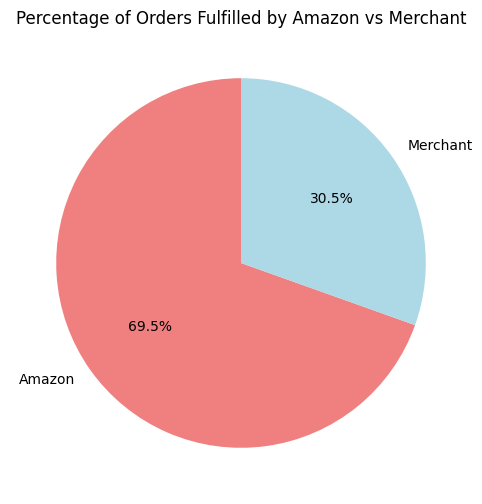

In [ ]:
# Fulfillment by Amazon vs Merchant
plt.figure(figsize=(6, 6))
fulfillment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)
plt.title('Percentage of Orders Fulfilled by Amazon vs Merchant')
plt.ylabel('')
plt.show()


# Average Quantity Ordered by Category

In [ ]:
average_quantity_per_category = data.groupby('Category')['Qty'].mean().sort_values(ascending=False).head(10)


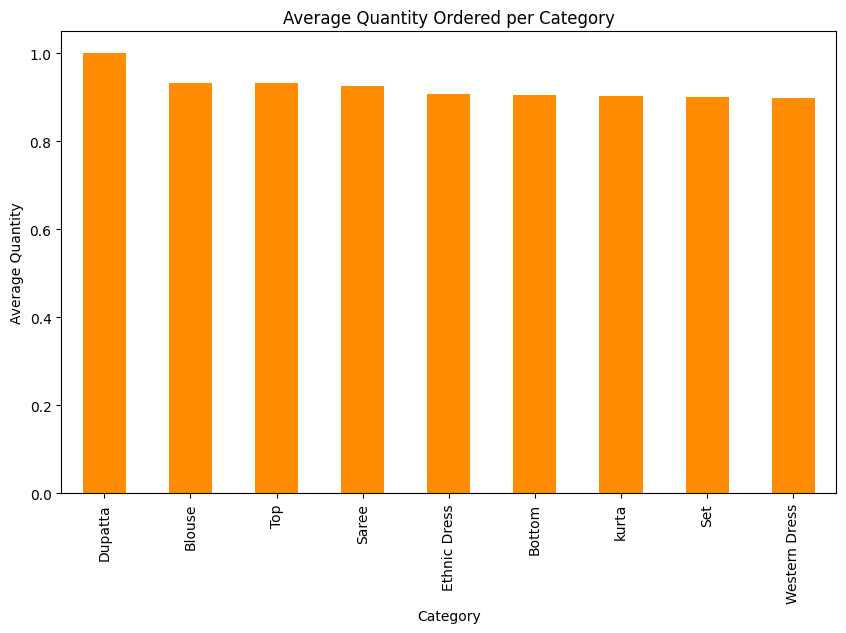

In [ ]:

plt.figure(figsize=(10, 6))
average_quantity_per_category.plot(kind='bar', color='darkorange')
plt.title('Average Quantity Ordered per Category')
plt.ylabel('Average Quantity')
plt.show()


# Overall Cancellation

In [ ]:
# Calculate the count of specific values in the 'Calculated Status' column
return_and_cancelled_counts = data['Status'].value_counts()

# Filter the counts for 'Shipped - Return to Seller', 'Cancelled', and 'Shipped - Returning to Seller'
specific_status_counts = return_and_cancelled_counts[
    return_and_cancelled_counts.index.isin(['Shipped - Returned to Seller', 'Cancelled', 'Shipped - Returning to Seller'])
]

# Calculate the total count of the filtered statuses
cancelled_orders = specific_status_counts.sum()

# Display the specific counts and total
specific_status_counts, total_count

(Status
 Cancelled                        18338
 Shipped - Returned to Seller      1953
 Shipped - Returning to Seller      145
 Name: count, dtype: int64,
 20436)

In [ ]:
cancelled_orders

20436

# Grouping by categories to find the problematic categories

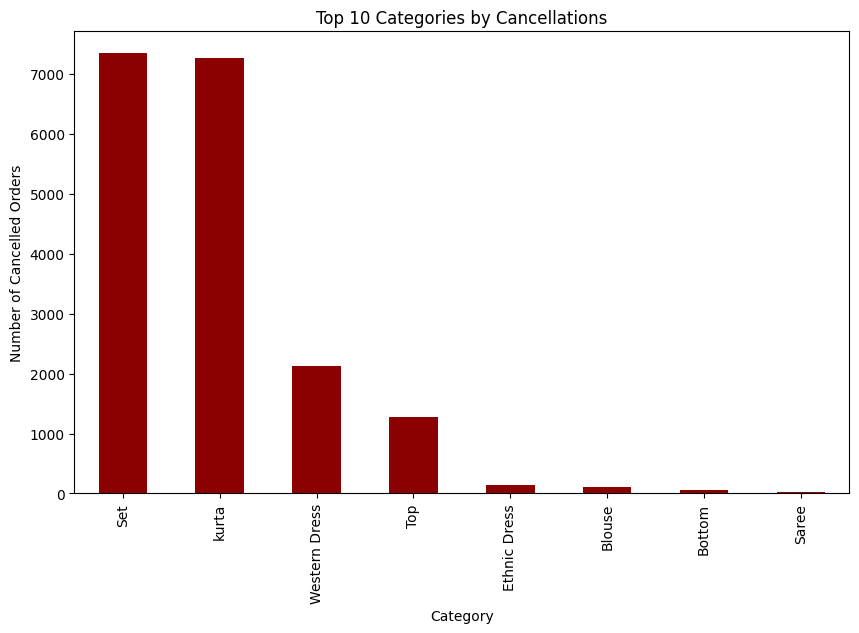

In [ ]:

category_cancellations = data[data['Status'] == 'Cancelled'].groupby('Category')['Order ID'].count().sort_values(ascending=False).head(10)

# Top 10 Categories by Cancellations
plt.figure(figsize=(10, 6))
category_cancellations.plot(kind='bar', color='darkred')
plt.title('Top 10 Categories by Cancellations')
plt.ylabel('Number of Cancelled Orders')
plt.show()

# conclusion

1.	Total Revenue: The total revenue generated during the analyzed period is ₹71,772,313.62 .suggesting seasonal growth likely due to sales events or holidays.
2.	Top-Selling Product Categories: The Set category led the sales, contributing to a significant portion of the total revenue. It was followed by Kurta and Western Dress categories, which also performed well.
3.	Average Order Value (AOV): The average order value is calculated to be ₹596.3 , indicating the typical spending pattern of customers per order.
4.	Fulfillment Methods: Orders fulfilled by Amazon generated higher revenue compared to those fulfilled by Merchants. Amazon’s fulfillment accounted for 69.5% of total Orders, highlighting its efficiency in managing orders. Refer the pie chart for better understanding.
5.	Peak Sales Days : The Day of Sunday saw the highest sales volume, while Tuesday and Wednesday also showed strong performance. Thursday had significantly lower sales . Refer the Column chart for better understanding.
6.	Return and Cancellation Rates: The overall cancellation rate stands at approximately 16% , affecting the company’s profitability. A deeper analysis indicates that Set and Kurta items had the highest return and cancellation rates .
7.	Top Cities for Sales: , Bangalore, Hyderabad and Mumbai were the top-performing cities in terms of sales, collectively contributing to total revenue. These cities were key markets for the company’s growth.
8.	B2B vs B2C Sales: B2C customers exhibited higher average order values, with bulk orders for Kurta and Set items. B2B customers were more price-sensitive, reflected in smaller, more frequent orders.
These conclusions provide actionable insights for improving logistics, customer satisfaction, and overall revenue growth(Problem Statement).



# Based on the exploratory data analysis (EDA) and the insights gathered, here are several recommendations to help the e-commerce company.


1.	Address High return rates, especially in clothing, by improving product descriptions with detailed sizing guides and introducing size recommendation tools or virtual fitting rooms.
2.	Capitalize on peak sales periods, By planning targeted marketing campaigns and offering discounts during off-peak months to balance revenue across the year.
3.	Implement loyalty programs, personalized offers, and smaller bundle packages to increase average order value and customer retention in the B2C segment.
4.	Invest in localized marketing and improved delivery options (e.g., same-day delivery) in top cities like Mumbai, Bangalore, and Chennai to enhance the customer experience.
5.	Reduce order cancellations by introducing real-time stock tracking and sending timely notifications to customers about delayed or out-of-stock items.
6.	Regularly collect and analyze customer feedback to address pain points related to returns, cancellations, and overall satisfaction, leading to improved retention.


> Add blockquote

